In [78]:
import pandas as pd
import plotnine as p9
from sklearn.feature_extraction.text import CountVectorizer
import textstat
import numpy as np
import os

# Label analysis

In [40]:
def get_label_information(train, validation, test):
  train['split'] = 'Train'
  validation['split'] = 'Validation'
  test['split'] = 'Test'
  df = pd.concat([train, validation, test])

  plot_df = df[['split', 'label']].groupby('split', as_index = False).value_counts(normalize = True)
  plot_df['proportion'] = plot_df['proportion'].round(4) * 100
  plot_df['label'] = pd.Categorical(plot_df['label'], categories = plot_df['label'].unique().sort())
  plot_df['split'] = pd.Categorical(plot_df['split'], categories = ['Train', 'Validation', 'Test'])

  display(plot_df)

  return p9.ggplot(
    plot_df,
    p9.aes(x = 'label', y = 'proportion', fill = 'split')
  ) + \
    p9.geom_col(position = 'dodge') + \
    p9.ylab('Percentage') + \
    p9.xlab('Label') + \
    p9.labs(fill = 'Split') + \
    p9.theme_gray() + \
    p9.theme(
      legend_position = 'top',
      figure_size = (16, 9),
      text = p9.element_text(size = 12)
    )

## SST-2

,split,label,proportion
0,Test,0.0,50.08
1,Test,1.0,49.92
2,Train,1.0,52.17
3,Train,0.0,47.83
4,Validation,1.0,50.92
5,Validation,0.0,49.08


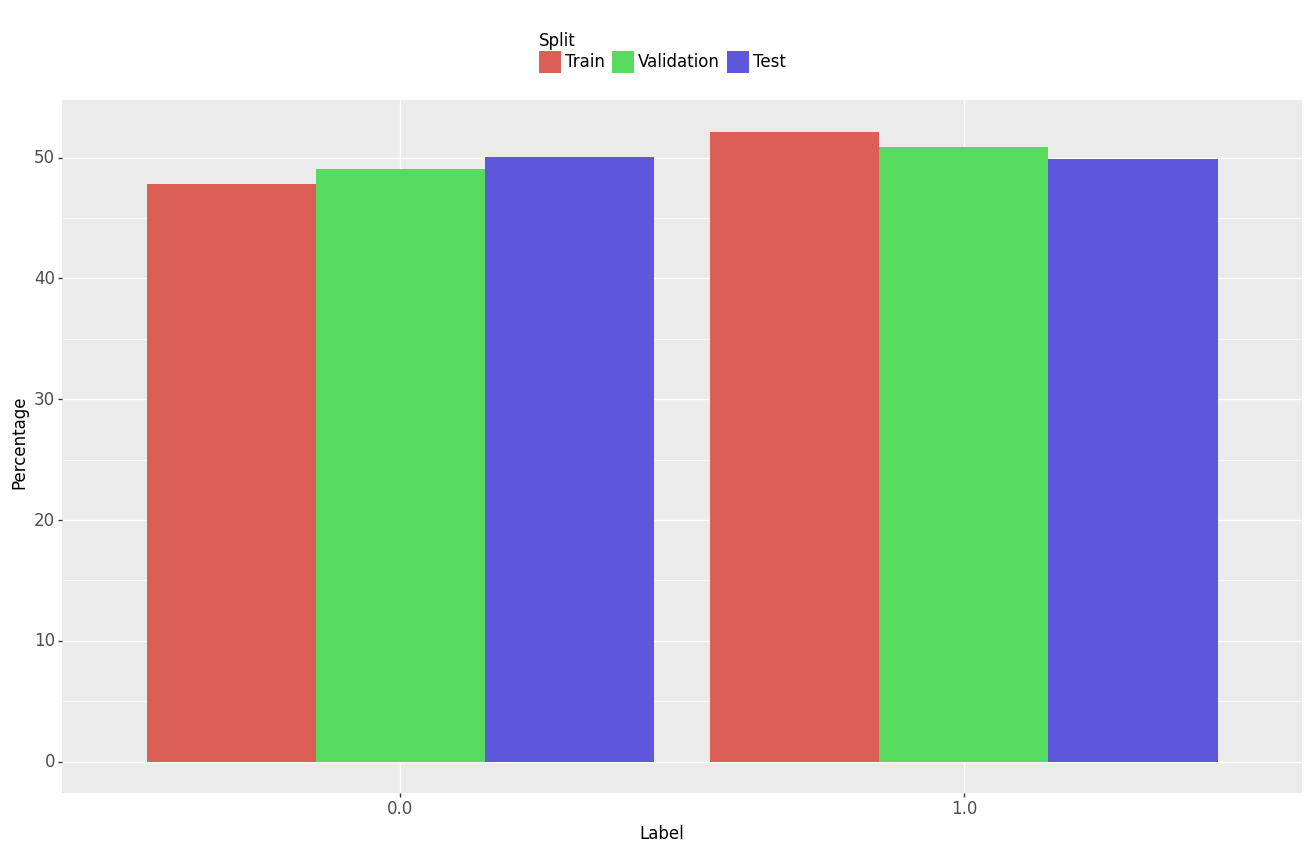

<ggplot: (809508273)>

In [41]:
get_label_information(
  pd.read_csv('../../data/with_validation_splits/SST-2/train.csv'),
  pd.read_csv('../../data/with_validation_splits/SST-2/validation.csv'),
  pd.read_csv('../../data/with_validation_splits/SST-2/test.csv'),
)

## Ohsumed

,split,label,proportion
0,Test,3,14.84
1,Test,13,14.59
2,Test,22,10.36
3,Test,9,8.46
4,Test,20,7.74
...,...,...,...
64,Validation,8,1.04
65,Validation,6,0.89
66,Validation,1,0.74
67,Validation,2,0.60


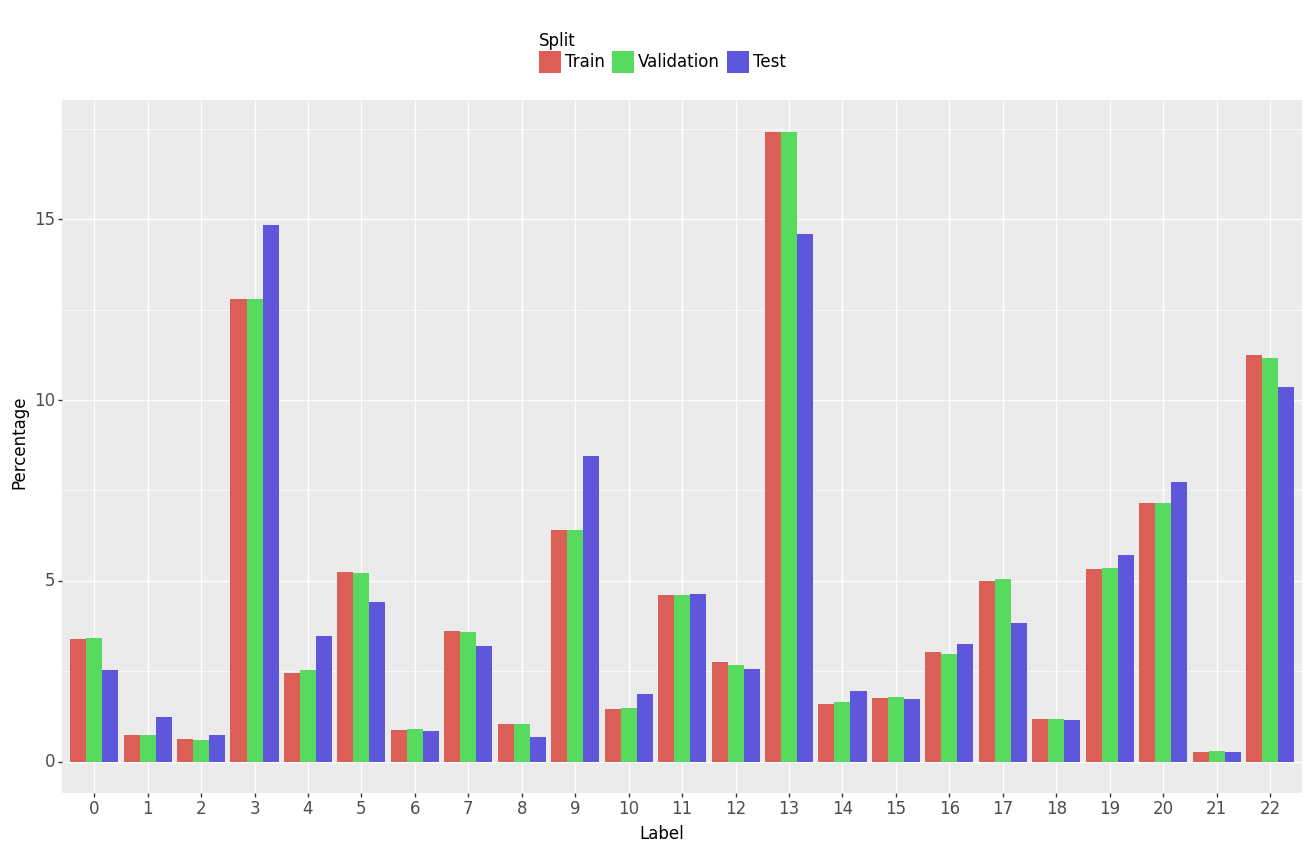

<ggplot: (809508408)>

In [42]:
get_label_information(
  pd.read_csv('../../data/with_validation_splits/Ohsumed/train.csv'),
  pd.read_csv('../../data/with_validation_splits/Ohsumed/validation.csv'),
  pd.read_csv('../../data/with_validation_splits/Ohsumed/test.csv'),
)

## R8

,split,label,proportion
0,Test,2,49.47
1,Test,0,31.80
2,Test,1,5.53
3,Test,5,3.97
4,Test,4,3.70
5,Test,7,3.43
6,Test,6,1.64
7,Test,3,0.46
8,Train,2,51.78
9,Train,0,29.10


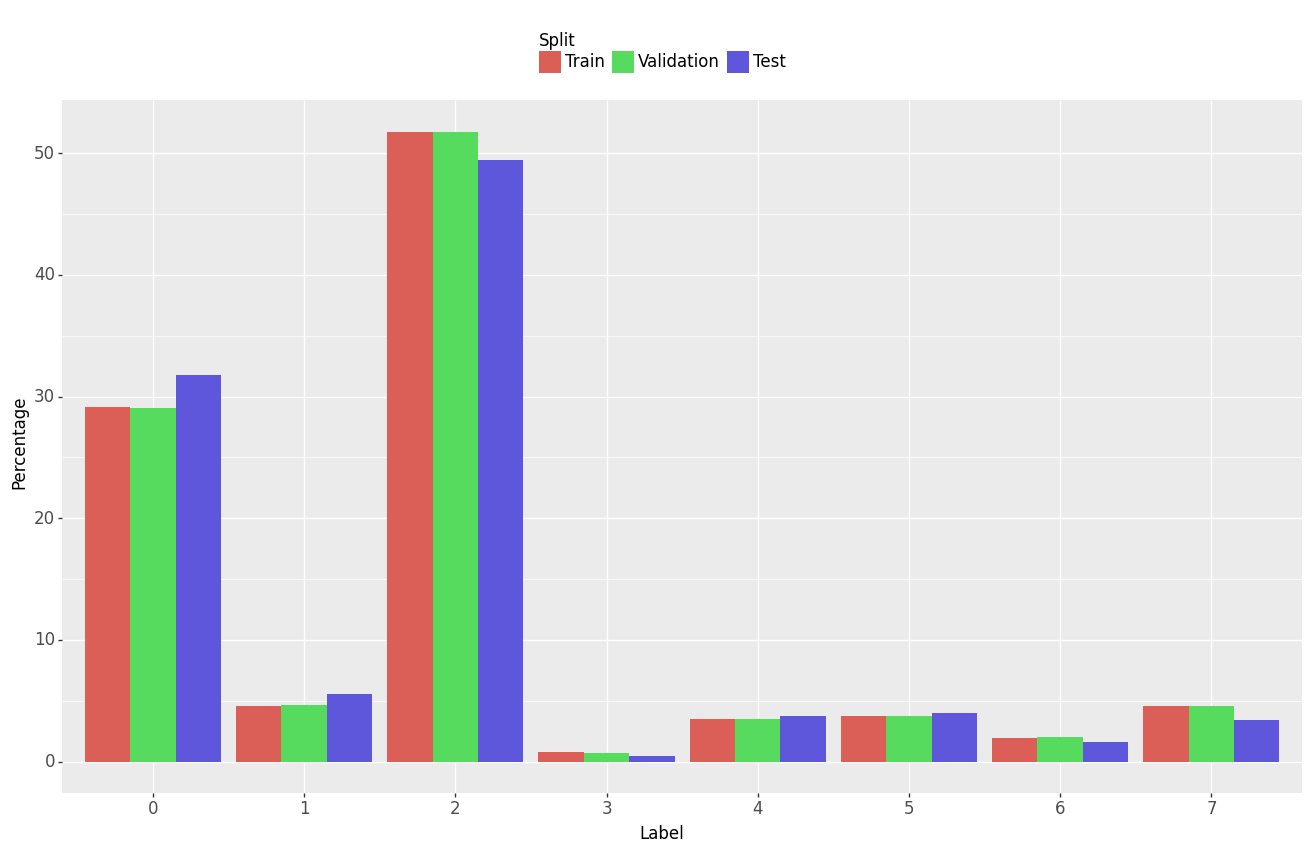

<ggplot: (809545981)>

In [43]:
get_label_information(
  pd.read_csv('../../data/with_validation_splits/R8/train.csv'),
  pd.read_csv('../../data/with_validation_splits/R8/validation.csv'),
  pd.read_csv('../../data/with_validation_splits/R8/test.csv'),
)

## IMDb top-1000

,split,label,proportion
0,Test,1,53.43
1,Test,0,46.57
2,Train,1,53.80
3,Train,0,46.20
4,Validation,1,53.33
5,Validation,0,46.67


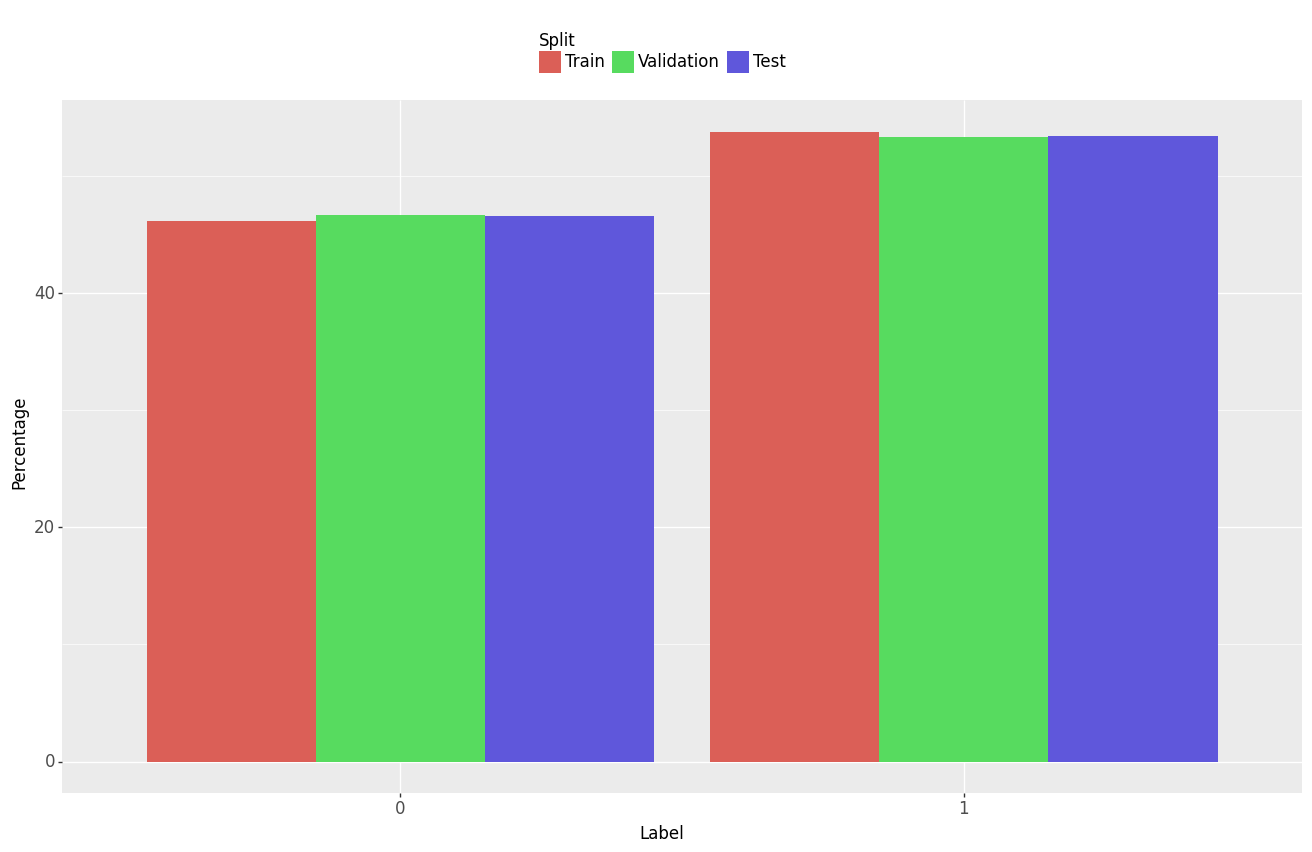

<ggplot: (812129302)>

In [44]:
get_label_information(
  pd.read_csv('../../data/with_validation_splits/IMDb-top_1000/train.csv'),
  pd.read_csv('../../data/with_validation_splits/IMDb-top_1000/validation.csv'),
  pd.read_csv('../../data/with_validation_splits/IMDb-top_1000/test.csv'),
)

## RTSP/MR

,split,label,proportion
0,Test,0,50.0
1,Test,1,50.0
2,Train,0,50.0
3,Train,1,50.0
4,Validation,0,50.0
5,Validation,1,50.0


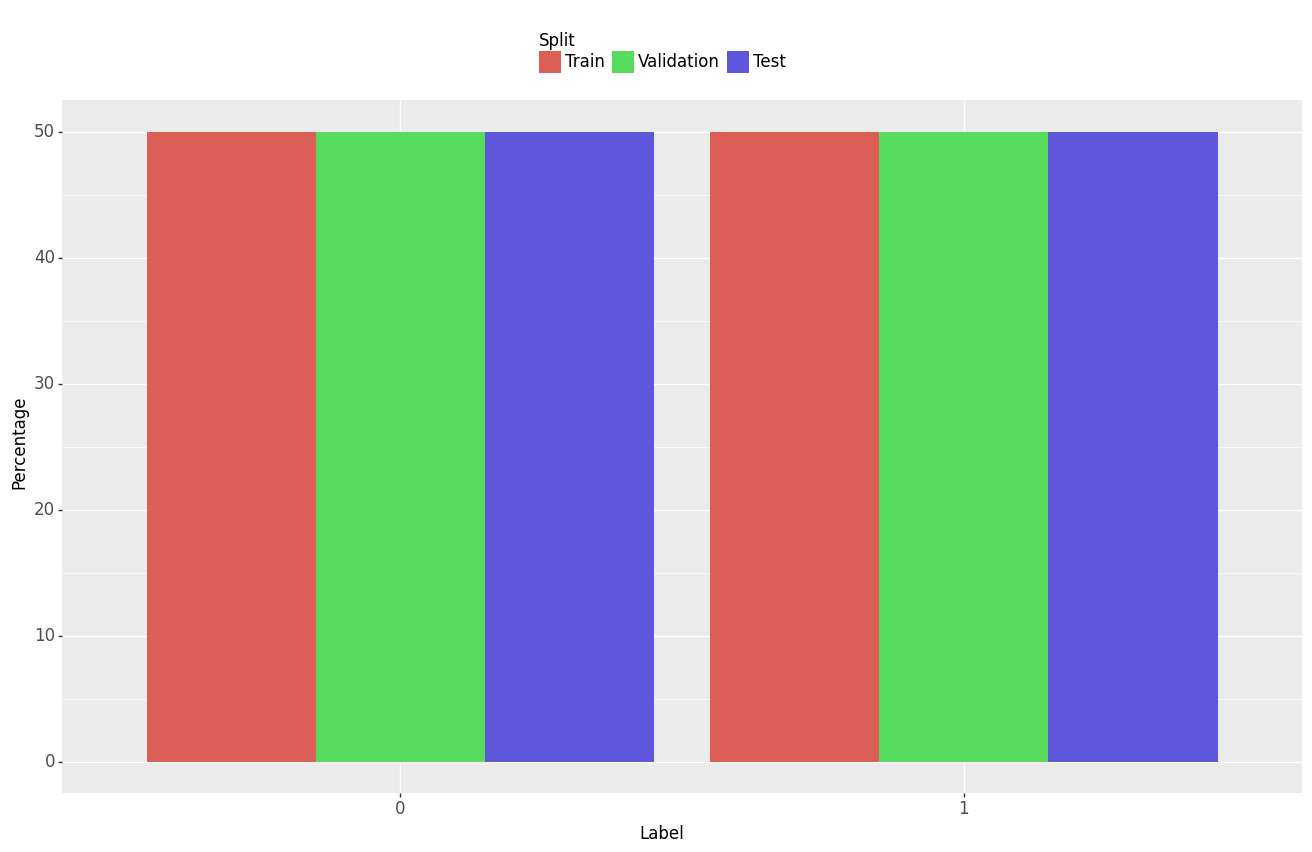

<ggplot: (812139956)>

In [45]:
get_label_information(
  pd.read_csv('../../data/with_validation_splits/RTSP/train.csv'),
  pd.read_csv('../../data/with_validation_splits/RTSP/validation.csv'),
  pd.read_csv('../../data/with_validation_splits/RTSP/test.csv'),
)

# Text property analysis

In [84]:
# https://pypi.org/project/textstat/
def flesch_reading_ease_categorical(flesch_reading_score):
  #flesch_reading_score = textstat.flesch_reading_ease(text)
  if flesch_reading_score >= 90:
    return 'Very Easy'
  elif flesch_reading_score >= 80:
    return 'Easy'
  elif flesch_reading_score >= 70:
    return 'Fairly Easy'
  elif flesch_reading_score >= 60:
    return 'Standard'
  elif flesch_reading_score >= 50:
    return 'Fairly Difficult'
  elif flesch_reading_score >= 30:
    return 'Difficult'
  else:
    return 'Very Confusing'

def get_text_information(dataset, train, validation, test):
  vectorizer = CountVectorizer() 
  
  X_train = vectorizer.fit_transform(train['text'])
  train['length'] = X_train.sum(axis = 1)

  X_validation = vectorizer.fit_transform(validation['text']) # fit_transform to count all words
  validation['length'] = X_validation.sum(axis = 1)

  X_test = vectorizer.fit_transform(test['text'])
  test['length'] = X_test.sum(axis = 1)

  print('-' * 20, 'Text length', '-' * 20)
  print('Train', train['length'].min(), train['length'].mean(), '±', train['length'].std(), train['length'].max())
  print('Validation', validation['length'].min(), validation['length'].mean(), '±', validation['length'].std(), validation['length'].max())
  print('Test', test['length'].min(), test['length'].mean(), '±', test['length'].std(), test['length'].max())
  print('')

  train['unique_words'] = np.array((X_train > 0).sum(axis = 1)).flatten()
  validation['unique_words'] = np.array((X_validation > 0).sum(axis = 1)).flatten()
  test['unique_words'] = np.array((X_test > 0).sum(axis = 1)).flatten()

  train['type_token_ratio'] = train['unique_words'] / train['length']
  validation['type_token_ratio'] = validation['unique_words'] / validation['length']
  test['type_token_ratio'] = test['unique_words'] / test['length']
  
  print('-' * 20, 'Type-token ratio', '-' * 20)
  print('Train', train['type_token_ratio'].min(), train['type_token_ratio'].mean(), '±', train['type_token_ratio'].std(), train['type_token_ratio'].max())
  print('Validation', validation['type_token_ratio'].min(), validation['type_token_ratio'].mean(), '±', validation['type_token_ratio'].std(), validation['type_token_ratio'].max())
  print('Test', test['type_token_ratio'].min(), test['type_token_ratio'].mean(), '±', test['type_token_ratio'].std(), test['type_token_ratio'].max())
  print('')

  train['Flesch_Reading_ease_score'] = train['text'].apply(textstat.flesch_reading_ease)
  validation['Flesch_Reading_ease_score'] = validation['text'].apply(textstat.flesch_reading_ease)
  test['Flesch_Reading_ease_score'] = test['text'].apply(textstat.flesch_reading_ease)

  print('-' * 20, 'Flesch-Reading ease score', '-' * 20)
  print('Train', train['Flesch_Reading_ease_score'].min(), train['Flesch_Reading_ease_score'].mean(), '±', train['Flesch_Reading_ease_score'].std(), train['Flesch_Reading_ease_score'].max(), flesch_reading_ease_categorical(train['Flesch_Reading_ease_score'].median()), train['Flesch_Reading_ease_score'].median())
  print('Validation', validation['Flesch_Reading_ease_score'].min(), validation['Flesch_Reading_ease_score'].mean(), '±', validation['Flesch_Reading_ease_score'].std(), validation['Flesch_Reading_ease_score'].max(), flesch_reading_ease_categorical(validation['Flesch_Reading_ease_score'].median()), validation['Flesch_Reading_ease_score'].median())
  print('Test', test['Flesch_Reading_ease_score'].min(), test['Flesch_Reading_ease_score'].mean(), '±', test['Flesch_Reading_ease_score'].std(), test['Flesch_Reading_ease_score'].max(), flesch_reading_ease_categorical(test['Flesch_Reading_ease_score'].median()), test['Flesch_Reading_ease_score'].median())
  print('')

  train['average_syllables_per_word'] = train['text'].apply(textstat.syllable_count) / train['length']
  validation['average_syllables_per_word'] = validation['text'].apply(textstat.syllable_count) / validation['length']
  test['average_syllables_per_word'] = test['text'].apply(textstat.syllable_count) / test['length']

  print('-' * 20, 'Average syllables per word', '-' * 20)
  print('Train', train['average_syllables_per_word'].min(), train['average_syllables_per_word'].mean(), '±', train['average_syllables_per_word'].std(), train['average_syllables_per_word'].max())
  print('Validation', validation['average_syllables_per_word'].min(), validation['average_syllables_per_word'].mean(), '±', validation['average_syllables_per_word'].std(), validation['average_syllables_per_word'].max())
  print('Test', test['average_syllables_per_word'].min(), test['average_syllables_per_word'].mean(), '±', test['average_syllables_per_word'].std(), test['average_syllables_per_word'].max())
  print('')

  train['average_sentence_length'] = train['length'] / train['text'].apply(textstat.sentence_count)
  validation['average_sentence_length'] = validation['length'] / validation['text'].apply(textstat.sentence_count)
  test['average_sentence_length'] = test['length'] / test['text'].apply(textstat.sentence_count)

  print('-' * 20, 'Average sentence length', '-' * 20)
  print('Train', train['average_sentence_length'].min(), train['average_sentence_length'].mean(), '±', train['average_sentence_length'].std(), train['average_sentence_length'].max())
  print('Validation', validation['average_sentence_length'].min(), validation['average_sentence_length'].mean(), '±', validation['average_sentence_length'].std(), validation['average_sentence_length'].max())
  print('Test', test['average_sentence_length'].min(), test['average_sentence_length'].mean(), '±', test['average_sentence_length'].std(), test['average_sentence_length'].max())
  print('')

  train['percentage_monosyllabic_words'] = train['text'].apply(textstat.monosyllabcount) / train['length']
  validation['percentage_monosyllabic_words'] = validation['text'].apply(textstat.monosyllabcount) / validation['length']
  test['percentage_monosyllabic_words'] = test['text'].apply(textstat.monosyllabcount) / test['length']

  print('-' * 20, 'Percentage of monosyllabic words', '-' * 20)
  print('Train', train['percentage_monosyllabic_words'].min(), train['percentage_monosyllabic_words'].mean(), '±', train['percentage_monosyllabic_words'].std(), train['percentage_monosyllabic_words'].max())
  print('Validation', validation['percentage_monosyllabic_words'].min(), validation['percentage_monosyllabic_words'].mean(), '±', validation['percentage_monosyllabic_words'].std(), validation['percentage_monosyllabic_words'].max())
  print('Test', test['percentage_monosyllabic_words'].min(), test['percentage_monosyllabic_words'].mean(), '±', test['percentage_monosyllabic_words'].std(), test['percentage_monosyllabic_words'].max())
  print('')

  train['percentage_polysyllabic_words'] = train['text'].apply(textstat.polysyllabcount) / train['length']
  validation['percentage_polysyllabic_words'] = validation['text'].apply(textstat.polysyllabcount) / validation['length']
  test['percentage_polysyllabic_words'] = test['text'].apply(textstat.polysyllabcount) / test['length']

  print('-' * 20, 'Percentage of polysyllabic words', '-' * 20)
  print('Train', train['percentage_polysyllabic_words'].min(), train['percentage_polysyllabic_words'].mean(), '±', train['percentage_polysyllabic_words'].std(), train['percentage_polysyllabic_words'].max())
  print('Validation', validation['percentage_polysyllabic_words'].min(), validation['percentage_polysyllabic_words'].mean(), '±', validation['percentage_polysyllabic_words'].std(), validation['percentage_polysyllabic_words'].max())
  print('Test', test['percentage_polysyllabic_words'].min(), test['percentage_polysyllabic_words'].mean(), '±', test['percentage_polysyllabic_words'].std(), test['percentage_polysyllabic_words'].max())
  print('')

  os.makedirs(f'../../data/text_properties/{dataset}', exist_ok = True)
  train.drop(columns = ['text', 'label']).reset_index(names = 'index').to_csv(f'../../data/text_properties/{dataset}/train.csv', index = False)
  validation.drop(columns = ['text', 'label']).reset_index(names = 'index').to_csv(f'../../data/text_properties/{dataset}/validation.csv', index = False)
  test.drop(columns = ['text', 'label']).reset_index(names = 'index').to_csv(f'../../data/text_properties/{dataset}/test.csv', index = False)

## SST-2

In [85]:
get_text_information(
  'SST-2',
  pd.read_csv('../../data/with_validation_splits/SST-2/train.csv'),
  pd.read_csv('../../data/with_validation_splits/SST-2/validation.csv'),
  pd.read_csv('../../data/with_validation_splits/SST-2/test.csv'),
)

-------------------- Text length --------------------
Train 1 16.30736994219653 ± 8.326767194135167 47
Validation 1 16.567660550458715 ± 7.847865149353508 43
Test 1 16.340472267984623 ± 8.013618463324885 50

-------------------- Type-token ratio --------------------
Train 0.5833333333333334 0.9495522212654126 ± 0.06237850707979926 1.0
Validation 0.6 0.9494763099124625 ± 0.06399728377805121 1.0
Test 0.64 0.9504782078250463 ± 0.06388829942782412 1.0

-------------------- Flesch-Reading ease score --------------------
Train -301.79 60.091791907514455 ± 27.52288012372629 121.22 Standard 61.67
Validation -136.65 61.0841628440367 ± 25.85397849694335 121.22 Standard 62.34
Test -53.06 61.735255354200994 ± 25.08327429690927 121.22 Standard 63.36

-------------------- Average syllables per word --------------------
Train 0.6 1.6126109964055453 ± 0.33759411794516136 4.5
Validation 1.0 1.5929456981429997 ± 0.30989645046443726 3.5
Test 0.9629629629629629 1.5890608399439201 ± 0.30670428846176967 3.2

## Ohsumed

In [86]:
get_text_information(
  'Ohsumed',
  pd.read_csv('../../data/with_validation_splits/Ohsumed/train.csv'),
  pd.read_csv('../../data/with_validation_splits/Ohsumed/validation.csv'),
  pd.read_csv('../../data/with_validation_splits/Ohsumed/test.csv'),
)

-------------------- Text length --------------------
Train 31 181.7687150837989 ± 69.27027395625274 420
Validation 34 182.5595238095238 ± 68.68350727399525 418
Test 27 183.14988869651248 ± 73.74955139113287 597

-------------------- Type-token ratio --------------------
Train 0.3047945205479452 0.5722075710875862 ± 0.08887217690997488 0.9090909090909091
Validation 0.34296028880866425 0.5725306893063695 ± 0.08713521317704628 0.8867924528301887
Test 0.3018867924528302 0.5733639876933319 ± 0.09023598435521038 0.9230769230769231

-------------------- Flesch-Reading ease score --------------------
Train -16.99 34.28651396648044 ± 14.207854248400345 83.25 Difficult 34.26
Validation -12.08 34.31147321428571 ± 13.262682182009053 70.5 Difficult 34.935
Test -21.89 33.67099925797675 ± 13.97003406393133 83.66 Difficult 34.26

-------------------- Average syllables per word --------------------
Train 1.3432835820895523 1.834664587350605 ± 0.1492669195315007 2.511111111111111
Validation 1.479452054

## R8

In [87]:
get_text_information(
  'R8',
  pd.read_csv('../../data/with_validation_splits/R8/train.csv'),
  pd.read_csv('../../data/with_validation_splits/R8/validation.csv'),
  pd.read_csv('../../data/with_validation_splits/R8/test.csv'),
)

-------------------- Text length --------------------
Train 5 101.70054694621696 ± 116.14030890014791 887
Validation 5 99.15861440291705 ± 112.1907932434267 772
Test 7 91.1576062128826 ± 102.73192565748288 806

-------------------- Type-token ratio --------------------
Train 0.2766990291262136 0.6688912886634618 ± 0.15467881720823026 1.0
Validation 0.2878787878787879 0.6700522789856382 ± 0.151705399599537 1.0
Test 0.28654970760233917 0.6564114424328777 ± 0.14878792790711584 1.0

-------------------- Flesch-Reading ease score --------------------
Train -890.07 -21.592682315405654 ± 128.77241430616533 113.1 Very Confusing 14.3
Validation -748.31 -19.147219690063807 ± 124.15196102109407 106.0 Very Confusing 15.32
Test -773.69 -7.889383280036545 ± 115.86723166852686 114.12 Very Confusing 22.76

-------------------- Average syllables per word --------------------
Train 1.0 1.4745106371625187 ± 0.2065414228712943 2.5714285714285716
Validation 1.0 1.4779864453424933 ± 0.20966076762472752 2.25

## IMDb top-1000

In [88]:
get_text_information(
  'IMDb-top_1000',
  pd.read_csv('../../data/with_validation_splits/IMDb-top_1000/train.csv'),
  pd.read_csv('../../data/with_validation_splits/IMDb-top_1000/validation.csv'),
  pd.read_csv('../../data/with_validation_splits/IMDb-top_1000/test.csv'),
)

-------------------- Text length --------------------
Train 770 907.738 ± 143.0441211556574 2386
Validation 755 870.4121212121212 ± 78.05368601777131 1047
Test 754 894.4358208955224 ± 152.45005435323125 2271

-------------------- Type-token ratio --------------------
Train 0.2799664710813076 0.47002763215286225 ± 0.0439867921944533 0.6211562115621156
Validation 0.2784688995215311 0.47485899197583964 ± 0.04479384363165757 0.5652620760534429
Test 0.3107932379713914 0.47363719546440736 ± 0.043820681005455664 0.6022443890274314

-------------------- Flesch-Reading ease score --------------------
Train 26.18 64.3689 ± 9.838660797210418 88.43 Standard 66.13499999999999
Validation 34.56 64.04303030303029 ± 10.23242004755297 89.38 Standard 65.25
Test 27.46 64.17125373134328 ± 10.160224176152765 85.59 Standard 64.54

-------------------- Average syllables per word --------------------
Train 1.2719186785260483 1.4356207765516726 ± 0.06457659762771538 1.6744186046511629
Validation 1.2866593164277

## RTSP/MR

In [89]:
get_text_information(
  'RTSP',
  pd.read_csv('../../data/with_validation_splits/RTSP/train.csv'),
  pd.read_csv('../../data/with_validation_splits/RTSP/validation.csv'),
  pd.read_csv('../../data/with_validation_splits/RTSP/test.csv'),
)

-------------------- Text length --------------------
Train 1 18.112381287372493 ± 8.460838322012462 50
Validation 1 18.139240506329113 ± 8.506586857939714 47
Test 1 18.12774338773213 ± 8.48362281326239 46

-------------------- Type-token ratio --------------------
Train 0.4375 0.9426708062199745 ± 0.06595032602018566 1.0
Validation 0.6428571428571429 0.9427541849205446 ± 0.06440468317614434 1.0
Test 0.44 0.9430004442442761 ± 0.06433120103200889 1.0

-------------------- Flesch-Reading ease score --------------------
Train -133.6 58.53586176574042 ± 25.473866185894856 121.22 Standard 60.65
Validation -91.3 58.08040084388186 ± 26.72426504515593 121.22 Standard 60.31
Test -301.79 59.26079065841305 ± 25.151023937171324 119.19 Standard 60.655

-------------------- Average syllables per word --------------------
Train 0.6 1.5878758906446544 ± 0.322151930934562 4.0
Validation 1.0 1.595786446911969 ± 0.3356053193994964 3.5
Test 0.75 1.5773103160820139 ± 0.3000848006618229 4.5

---------------